In [1]:
!git clone https://github.com/huggingface/diffusers


Cloning into 'diffusers'...
remote: Enumerating objects: 62053, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 62053 (delta 1), reused 1 (delta 0), pack-reused 62044
Receiving objects: 100% (62053/62053), 42.30 MiB | 29.73 MiB/s, done.
Resolving deltas: 100% (45342/45342), done.


In [2]:
!pip install diffusers
!pip install transformers
!pip install accelerate
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.0 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
from PIL import Image
import io
import os
df_dataset = pd.read_parquet('/kaggle/input/dnd-img/train-00000-of-00001-9b40395dcd3257f2.parquet')

In [4]:
filtered_df = df_dataset[df_dataset['text'].str.contains(r',\s*orc\b')]
filtered_df = filtered_df[:5]  # потом убрать
filtered_df

,image,text
8,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"D&D Character, orc a woman with red hair and g..."
24,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"D&D Character, orc a woman sitting on the ground"
66,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"D&D Character, orc a werewolf with his arms cr..."
68,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"D&D Character, orc a man with a beard and a sword"
70,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"D&D Character, orc a creature in a cave"


In [5]:
import shutil
dir_name = 'images'
 
# shutil.rmtree(dir_name)
os.mkdir(dir_name)

In [6]:
import json
!pip install jsonlines
import jsonlines
df = []

for i in range(len(filtered_df)):
    dicta = filtered_df['image'].iloc[i]
    image = Image.open(io.BytesIO(dicta['bytes']))
    
    # Формируем путь с прямыми слешами
    img_path = os.path.join(dir_name, f'{i}.jpg')
    
    image.save(img_path)
    df.append([f'{i}.jpg', filtered_df['text'].iloc[i]])

df = pd.DataFrame(df, columns=['file_name', 'text'])
data = df.to_dict('records')
jsonl = [json.dumps(obj) for obj in data]
with open('images/metadata.jsonl', "w") as f:
    f.write("\n".join(jsonl))
with open('images/metadata.jsonl', 'r') as file:
    content = file.read()
    print(content)
    

{"file_name": "0.jpg", "text": "D&D Character, orc a woman with red hair and green eyes"}
{"file_name": "1.jpg", "text": "D&D Character, orc a woman sitting on the ground"}
{"file_name": "2.jpg", "text": "D&D Character, orc a werewolf with his arms crossed"}
{"file_name": "3.jpg", "text": "D&D Character, orc a man with a beard and a sword"}
{"file_name": "4.jpg", "text": "D&D Character, orc a creature in a cave"}


In [7]:
# from datasets import load_dataset
# data_files = {}
# data_files["train"] = os.path.join('/kaggle/working/images', "**")
# dataset = load_dataset(
#     "imagefolder",
#     data_files=data_files,
#     cache_dir='stor',
# )
# column_names = dataset["train"].column_names
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 1.6 MB/s eta 0:00:0000:01:00:01


In [8]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-luv27i24
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-luv27i24
  Resolved https://github.com/huggingface/diffusers to commit f29b93488dee9af000fab6e7bdb68ab565d50564
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2099055 sha256=736d0a268b8e320dc15fc0a837372e65f4affde0e16bd9e9ba237de5ed905b49
  Stored in directory: /tmp/pip-ephem-wheel-cache-ktlla8wi/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.27.2
    Uninstalling diffusers-0.27.2:
      Successfully uninstalled diffusers-0.27.2


In [9]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 33.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.1 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


In [10]:
# df.to_csv('captions.csv', index=False)

command = (f'python3 /kaggle/usr/lib/prior/prior.py '
           f'--train_data_dir="/kaggle/working/images" '
           f'--train_batch_size=1 '
           f'--num_train_epochs=100 '
#            f'--gradient_accumulation_steps=1 '
#            f'--gradient_checkpointing '
           f'--mixed_precision="fp16" '
           f'--learning_rate=1e-4 '
           f'--max_grad_norm=1 '
           f'--lr_scheduler="constant" '
           f'--lr_warmup_steps=0 ')

!{command}

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-05-08 13:04:17.668192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 13:04:17.668307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 13:04:17.773377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
tokenizer/tokenizer_config.json: 100%|█████████| 904/904 [00:00<00:00, 4.58MB/s]
tokenizer/vocab.json: 100%|██████

In [11]:
command = (f'python3 /kaggle/usr/lib/decoder/decoder.py '
           f'--train_data_dir="/kaggle/working/images" '
           f'--train_batch_size=1 '
           f'--num_train_epochs=100 '
#            f'--gradient_accumulation_steps=1 '
#            f'--gradient_checkpointing '
           f'--mixed_precision="fp16" '
           f'--learning_rate=1e-4 '
           f'--max_grad_norm=1 '
           f'--lr_scheduler="constant" '
           f'--lr_warmup_steps=0 '
           f'--output_dir="kandi-dec" ')

!{command}

2024-05-08 13:07:17.623662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 13:07:17.623718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 13:07:17.625172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
scheduler/scheduler_config.json: 100%|█████████| 317/317 [00:00<00:00, 1.73MB/s]
{'variance_type', 'rescale_betas_zero_snr', 'clip_sample_range', 'sample_max_value', 'dynamic_thresholding_ratio', 'trained_betas', 'timestep_spacing'} was not found in config. Values will be initialized to default values.
movq/config.json: 100%|████████████████████████| 660/660 [00:

prior model:  can generate clip image embedding from text
decoder model: can generate images from clip image embedding

kandinskiy:
1. prior model ( в том числе image encoder)
2. decoder model (в том числе unet)

общий код для склейки: 


In [12]:
import torch
state_dict_unet = torch.load('/kaggle/working/kandi-dec/unet_lora_state_dict.pth')
state_dict_prior = torch.load('/kaggle/working/kandi_2_2-model-finetuned-lora/prior_lora_state_dict.pth')

In [13]:
import sys
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
import PIL
import torch
from diffusers.utils import load_image
from torchvision import transforms
from transformers import CLIPVisionModelWithProjection
from diffusers.models import UNet2DConditionModel
from peft import LoraConfig
import numpy as np

2024-05-08 13:11:56.231630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 13:11:56.231688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 13:11:56.233263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
torch.cuda.empty_cache()
image_encoder = CLIPVisionModelWithProjection.from_pretrained('kandinsky-community/kandinsky-2-2-prior', subfolder='image_encoder').to(torch.float16).to('cuda')
unet = UNet2DConditionModel.from_pretrained('kandinsky-community/kandinsky-2-2-decoder', subfolder='unet').to(torch.float16).to('cuda')
prior = KandinskyV22PriorPipeline.from_pretrained('kandinsky-community/kandinsky-2-2-prior', image_encoder=image_encoder, torch_dtype=torch.float16)
prior = prior.to("cuda")
decoder = KandinskyV22Pipeline.from_pretrained('kandinsky-community/kandinsky-2-2-decoder', unet=unet, torch_dtype=torch.float16)
decoder = decoder.to("cuda")
negative_prior_prompt ='lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature'
img_emb = prior(prompt='orc with sword', num_inference_steps=25, num_images_per_prompt=1,)
negative_emb = prior(prompt=negative_prior_prompt, num_inference_steps=25, num_images_per_prompt=1)
images = decoder(image_embeds=img_emb.image_embeds, negative_image_embeds=negative_emb.image_embeds, num_inference_steps=50, height=512, width=512)
images.images[0]



model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (112 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature']


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

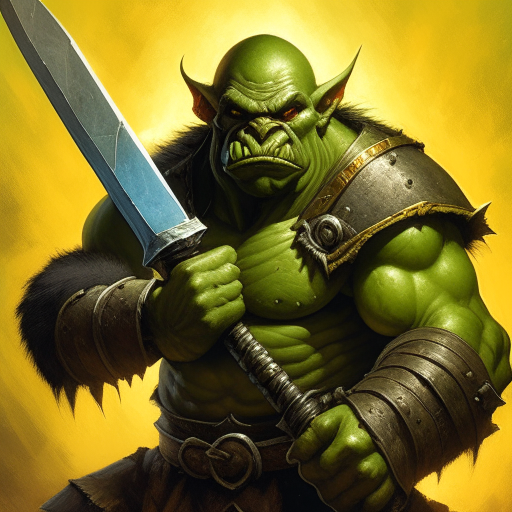

In [17]:
unet_lora_config = LoraConfig(
        r=4,
        lora_alpha=4,
        init_lora_weights="gaussian",
        target_modules=["to_k", "to_q", "to_v", "to_out.0", "add_v_proj", "add_k_proj"],
    )
decoder.unet.add_adapter(unet_lora_config)
decoder.unet.load_state_dict(state_dict_unet, strict=False)

prior_lora_config = LoraConfig(
        r=4,
        lora_alpha=4,
        init_lora_weights="gaussian",
        target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    )
prior.prior.add_adapter(prior_lora_config)
prior.prior.load_state_dict(state_dict_prior, strict=False)
img_emb = prior(prompt='orc with sword', num_inference_steps=25, num_images_per_prompt=1,)
negative_emb = prior(prompt=negative_prior_prompt, num_inference_steps=25, num_images_per_prompt=1)
images = decoder(image_embeds=img_emb.image_embeds, negative_image_embeds=negative_emb.image_embeds, num_inference_steps=50, height=512, width=512)
images.images[0]